# THz Testing Notebook 

In [1]:
import thz
import numpy as np
from  matplotlib import pyplot as plt

In [2]:
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["axes.grid"] = True

In [3]:
file_path = 'D:\\THz\\Samples\\Arandano_02.csv'

In [4]:
thz_image = thz.THZImage(file_path)

In [5]:
pulse = thz_image.get_column_index(17,22)

In [6]:
reference = thz_image.reference

In [7]:
pulse.shape

(2048,)

In [8]:
pulse.min()

-1.276493

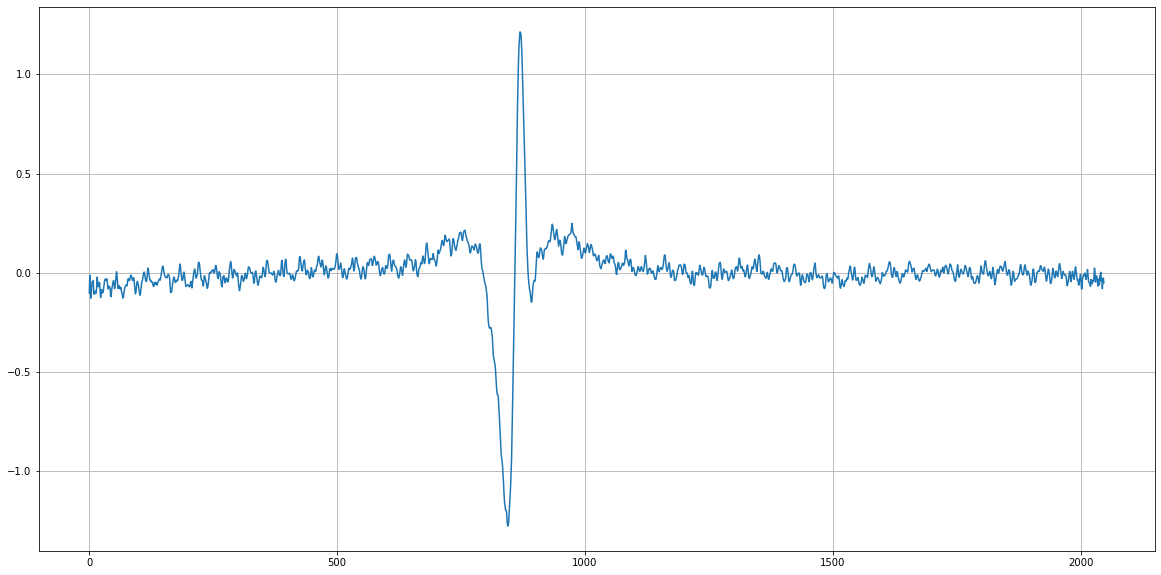

In [9]:
plt.plot(pulse)

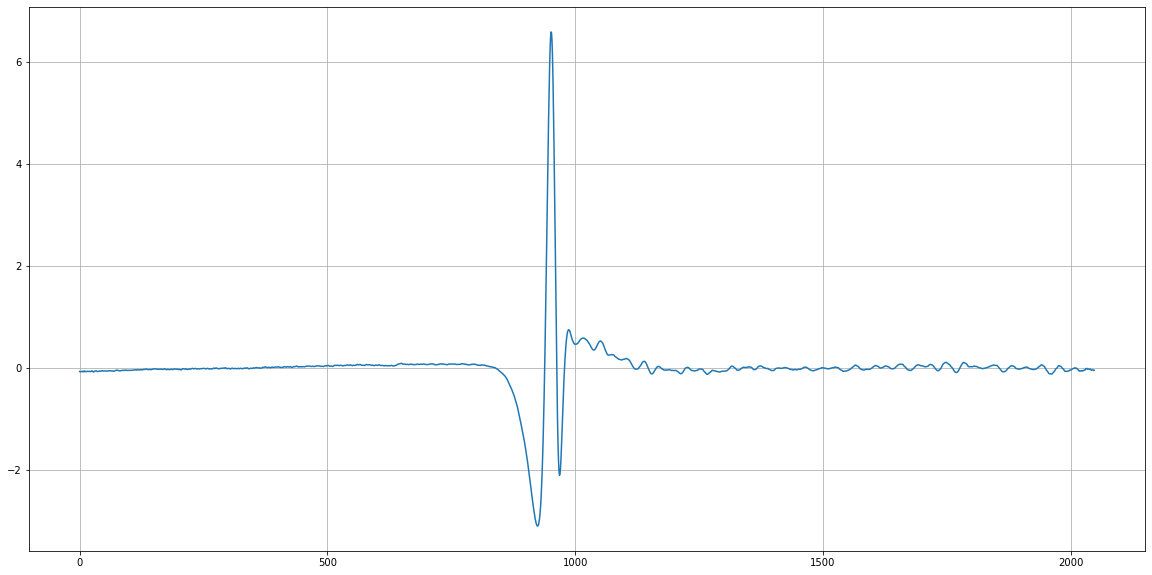

In [10]:
plt.plot(reference)

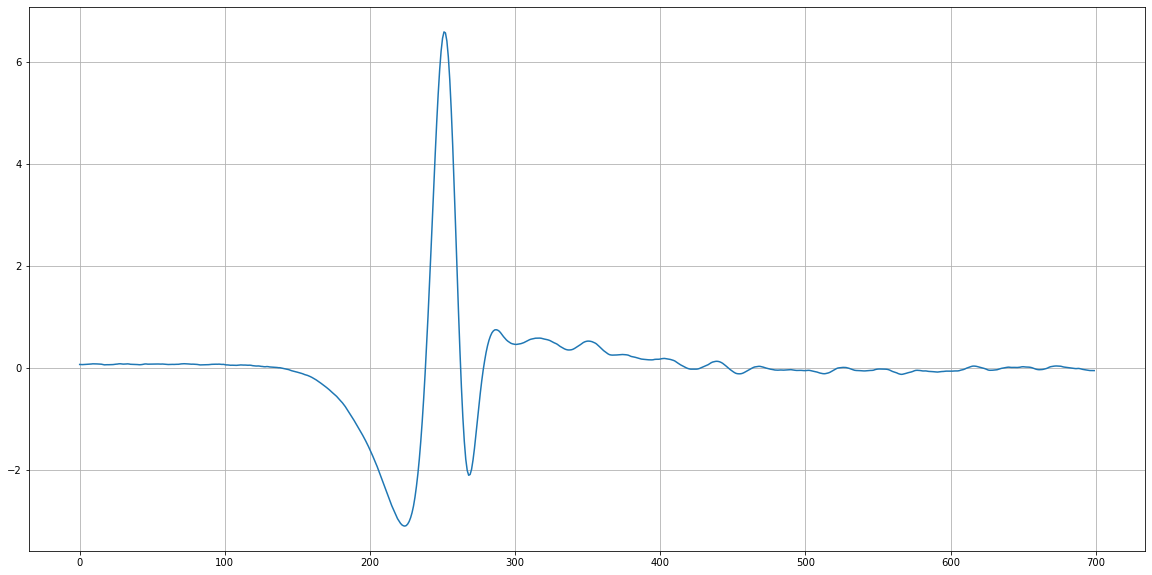

In [26]:
plt.plot(reference[700:1400])

In [27]:
fft_ref = np.abs(np.fft.fft(reference[850:1400]))

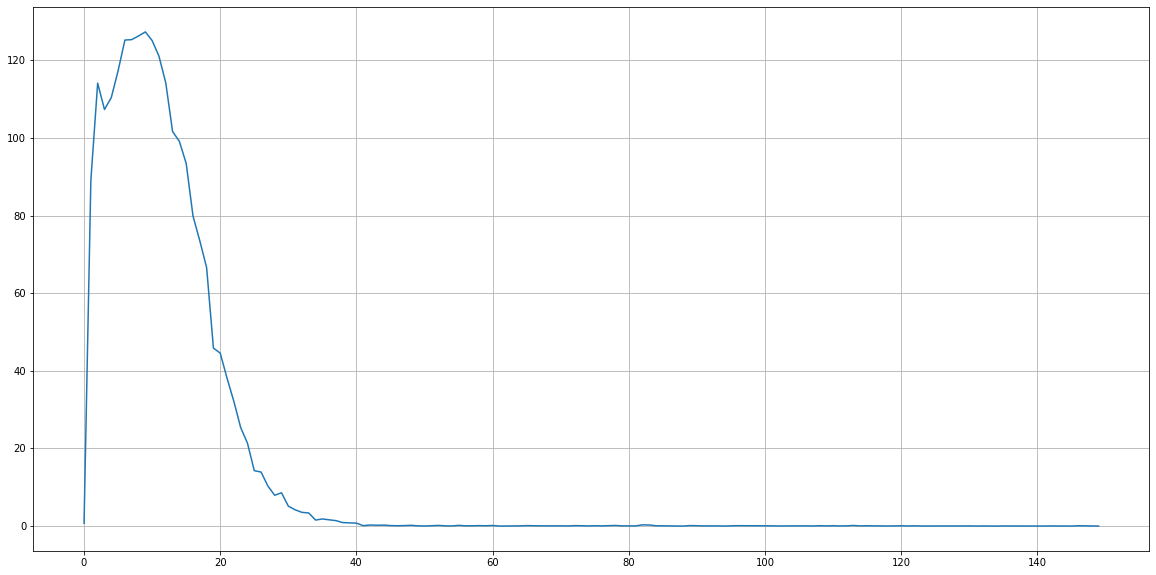

In [28]:
plt.plot(fft_ref[0:150])

In [14]:
fft = np.abs(np.fft.fft(pulse[600:1200]))

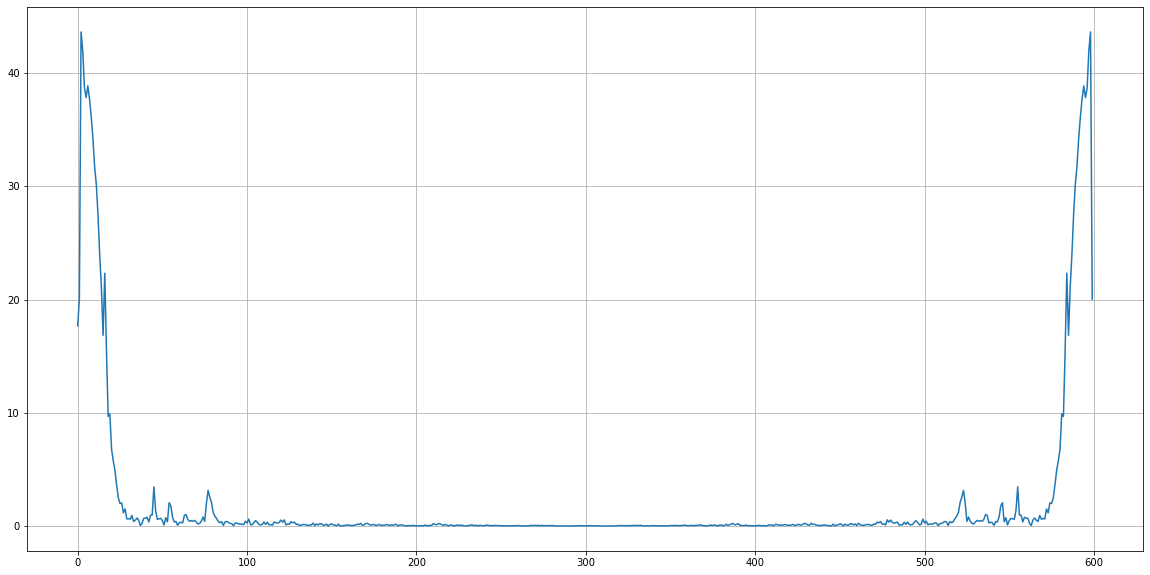

In [15]:
plt.plot(fft)

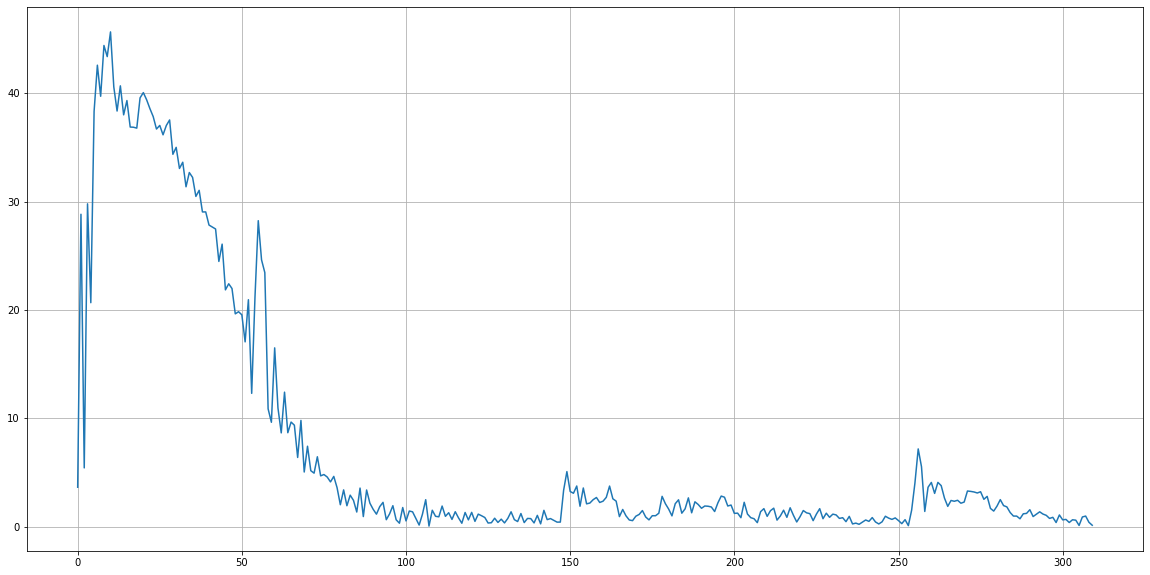

In [35]:
plt.plot(np.abs(np.fft.fft(pulse))[0:310])

In [17]:
plt.plot(rest_fft)

NameError: name 'rest_fft' is not defined